# This is LAB Session from Image segmentation for Image Features Extractions

1. you will learn how to use Hugging face frameworks
2. you will learn to use pretrained model image segmentation for background removal:briaai/RMBG-1.4
3. you will learn to make preprocessing on images before inference
4. you will learn to make postprocessing on images after inference
5. you will learn how to edit images
6. you will learn how photoshop works in reality / behind the scene
7. you will learn how to make merge difference predicted images to generate new image

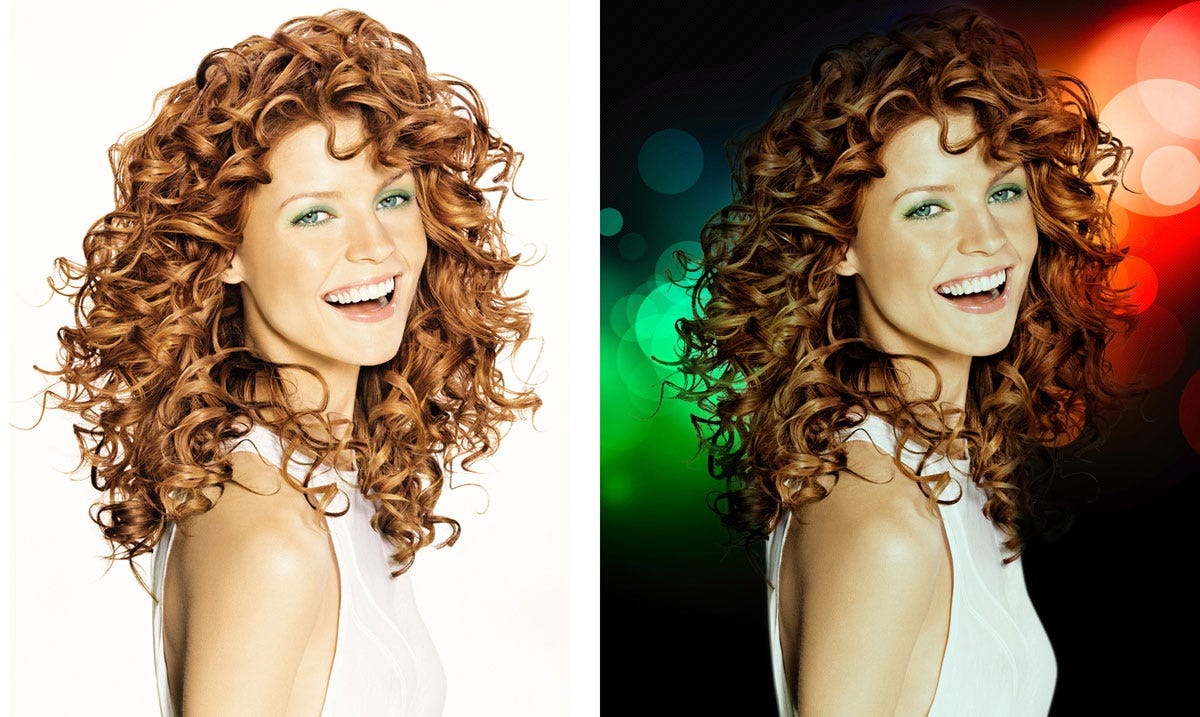

#### Model Loading by Hugging face
1. AutoModelForImageSegmentation
2. Pytorch

In [ ]:
from transformers import AutoModelForImageSegmentation
from torchvision.transforms.functional import normalize
model = AutoModelForImageSegmentation.from_pretrained("briaai/RMBG-1.4",trust_remote_code=True)


config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

MyConfig.py:   0%|          | 0.00/326 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyConfig.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


briarmbg.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- briarmbg.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/176M [00:00<?, ?B/s]

### Preparation of Preprocessing and Postprocessing
#### You will learn how to make preprocessing before inference then you will remove background from frontground pixels

In [ ]:
import numpy as np
import torch
from skimage import io
import torch.nn.functional as F
from PIL import Image

def preprocess_image(im: np.ndarray, model_input_size: list) -> torch.Tensor:
    if len(im.shape) < 3:
        im = im[:, :, np.newaxis]
    # orig_im_size=im.shape[0:2]
    im_tensor = torch.tensor(im, dtype=torch.float32).permute(2,0,1)
    im_tensor = F.interpolate(torch.unsqueeze(im_tensor,0), size=model_input_size, mode='bilinear')
    image = torch.divide(im_tensor,255.0)
    image = normalize(image,[0.5,0.5,0.5],[1.0,1.0,1.0])
    return image

def postprocess_image(result: torch.Tensor, im_size: list)-> np.ndarray:
    result = torch.squeeze(F.interpolate(result, size=im_size, mode='bilinear') ,0)
    ma = torch.max(result)
    mi = torch.min(result)
    result = (result-mi)/(ma-mi)
    im_array = (result*255).permute(1,2,0).cpu().data.numpy().astype(np.uint8)
    im_array = np.squeeze(im_array)
    return im_array

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# prepare input

image_path = "/tf/tensorflow-tutorials/coca.jpg"
orig_im = io.imread(image_path)
orig_im_size = orig_im.shape[0:2]
image = preprocess_image(orig_im, (640, 640)).to(device)

# inference
result=model(image)

# post process
result_image = postprocess_image(result[0][0], orig_im_size)

# save result
pil_im = Image.fromarray(result_image)
no_bg_image = Image.new("RGBA", pil_im.size, (0,0,0,0))
orig_image = Image.open(image_path)
no_bg_image.paste(orig_image, mask=pil_im)
image = no_bg_image.convert("RGB")
image.save("coca2.jpg")

In [ ]:
pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 2.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 3.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Alternatively you will learn how to use Huggging face pipeline without making your hands dirty on code analysis:
# HUGGING FACE PIPELINE

In [ ]:
from transformers import pipeline
image_path = "https://farm5.staticflickr.com/4007/4322154488_997e69e4cf_z.jpg"
pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True) # outputs a pillow mask
pillow_image = pipe(image_path) # applies mask on input and returns a pillow image
image = pillow_image.convert("RGB")
pillow_imag.save("pipe_image.jpg")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


# Here you will learn Image union / Composition , to merge and to generate new image

*Do not forget to edit pathes with your path!*

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import torch

import numpy as np
import torch
from skimage import io
import torch.nn.functional as F
from PIL import Image

def preprocess_image(im: np.ndarray, model_input_size: list) -> torch.Tensor:
    if len(im.shape) < 3:
        im = im[:, :, np.newaxis]
    # orig_im_size=im.shape[0:2]
    im_tensor = torch.tensor(im, dtype=torch.float32).permute(2,0,1)
    im_tensor = F.interpolate(torch.unsqueeze(im_tensor,0), size=model_input_size, mode='bilinear')
    image = torch.divide(im_tensor,255.0)
    image = normalize(image,[0.5,0.5,0.5],[1.0,1.0,1.0])
    return image

def postprocess_image(result: torch.Tensor, im_size: list)-> np.ndarray:
    result = torch.squeeze(F.interpolate(result, size=im_size, mode='bilinear') ,0)
    ma = torch.max(result)
    mi = torch.min(result)
    result = (result-mi)/(ma-mi)
    im_array = (result*255).permute(1,2,0).cpu().data.numpy().astype(np.uint8)
    im_array = np.squeeze(im_array)
    return im_array

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Step 1: Load the images (foreground and background)
foreground_url = "/tf/tensorflow-tutorials/horse_foreground.png"
background_url = "/tf/tensorflow-tutorials/background.png"

# prepare input

orig_im = io.imread(foreground_url)
orig_im_size = orig_im.shape[0:2]
image = preprocess_image(orig_im, (640, 640)).to(device)

with torch.no_grad():

    # inference
    result=model(image)

# post process
result_image = postprocess_image(result[0][0], orig_im_size)


# save result
pil_im = Image.fromarray(result_image)



# Open the original foreground image
## Add newly
foreground_image = Image.open(foreground_path).convert("RGBA")


# bacjground extraction
background_image = Image.open(background_url).resize(pil_im.size)

# create new image from pil_img foregrouind
composite_image = Image.new("RGBA", pil_im.size)

# Paste the background image onto the composite image
composite_image.paste(background_image, (0, 0))

# added new
# Paste the isolated subject onto the background using its alpha as the mask
composite_image.paste(foreground_image, (0, 0), mask=pil_im)

# Convert the final composite image to RGB and save it
composite_image = composite_image.convert("RGB")
composite_image.save("/tf/tensorflow-tutorials/united.jpg")

# Paste the isolated subject onto the background using its alpha as the mask
#composite_image.paste(pil_im, (0, 0), mask=pil_im)

# Convert the final composite image to RGB and save it
#composite_image = composite_image.convert("RGB")
#composite_image.save("united.jpg")

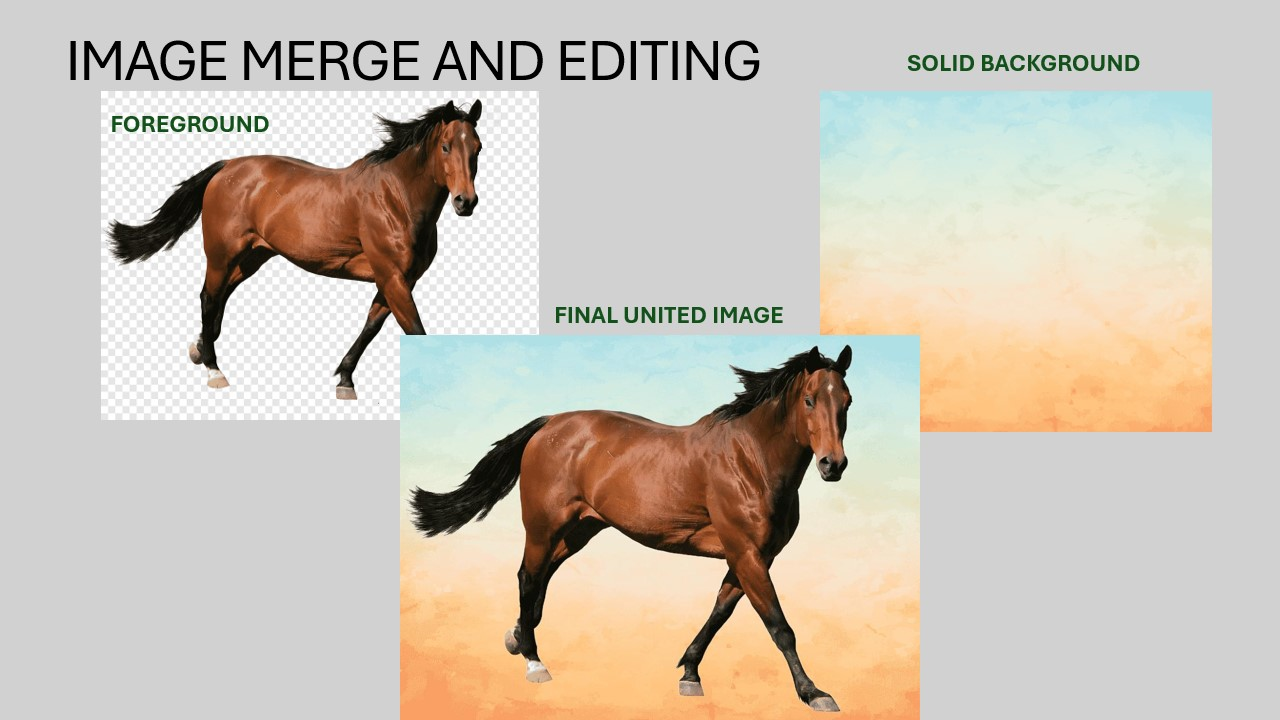

**Congratulations! now you are familiar with Hugging face Image removal Model. Try to collaborate with Hugging face more, by following my lessons...**